### Objective
### This file determines the feature importance for dataframe df_4
### according to the third approach which is defined in README file.
### A dataframe with ten principal components is cosndiered.
### Five configurable AI models are fitted to the dataset witht the PCs
### and the best model (configured 
### for the best hyperparameter values amoing the experimented ones)
### is determined through gridsearchcv. 
### The coefficients of the best model (best among the experimented oned)
### determine the feature importance.

In [1]:
import pandas as pd
import numpy as np

#import it from the notebook
import import_ipynb
from  cc_fi_initializing_variables  import *
import cc_fi_fcts_data_treatment
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.cluster as cluster

import os

import pickle

from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression, Lasso,Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV

importing Jupyter notebook from cc_fi_initializing_variables.ipynb
importing Jupyter notebook from cc_fi_fcts_data_treatment.ipynb


In [2]:
#clusters of the dataframe v_dataframe_1=df_4
#obtained by kmeans algo
val_name_dataframe_1_pcs

'df_7_pcs'

## Examination of the  dataframe df_7pcs with the Principal Components 

In [3]:
#we read the processed dataframe with the principal components from memory
v_dataframe_1=pd.read_pickle(val_name_data_1_for_pickle)
#v_dataframe_1

In [4]:
val_name_dataframe_1_pcs

'df_7_pcs'

In [5]:
#v_dataframe_1=df_4 
v_dataframe_1_pcs=pd.read_pickle(val_name_dataframe_1_pcs_for_pickle)

In [6]:
#we print the 5 first rows of it
v_dataframe_1_pcs.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-3.579996,-0.737358,-1.648207,0.846455,0.777909,0.859370,0.452206,0.149098,-0.299563,-0.326768
1,-3.329682,-1.844001,-1.390367,0.806565,1.297625,-0.592458,-0.633577,0.113260,0.238947,0.022103
2,-3.362805,-1.750909,-1.268825,0.455029,0.324343,0.928817,0.428107,-0.141464,0.075103,0.199972
3,-4.261757,-1.093388,-1.378526,0.625055,0.648659,0.679653,0.645614,-0.527247,0.602151,-0.438783
4,-3.258250,-1.804572,-1.390518,0.812247,1.287212,-0.488760,-0.693461,0.228685,0.061813,0.145014


In [7]:
#we verify again that there are no missing values
v_dataframe_1_pcs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61005 entries, 0 to 61004
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     61005 non-null  float64
 1   PC2     61005 non-null  float64
 2   PC3     61005 non-null  float64
 3   PC4     61005 non-null  float64
 4   PC5     61005 non-null  float64
 5   PC6     61005 non-null  float64
 6   PC7     61005 non-null  float64
 7   PC8     61005 non-null  float64
 8   PC9     61005 non-null  float64
 9   PC10    61005 non-null  float64
dtypes: float64(10)
memory usage: 4.7 MB


In [8]:
#the names of the features
v_titles=v_dataframe_1_pcs.columns.tolist()



#val_name_dataframe_1_pcs

#variable val_colors_for_feature_subplots is a 
#list with colors initialized in file 
#cc_fi_initializing_variables
v_colors=val_colors_for_feature_subplots

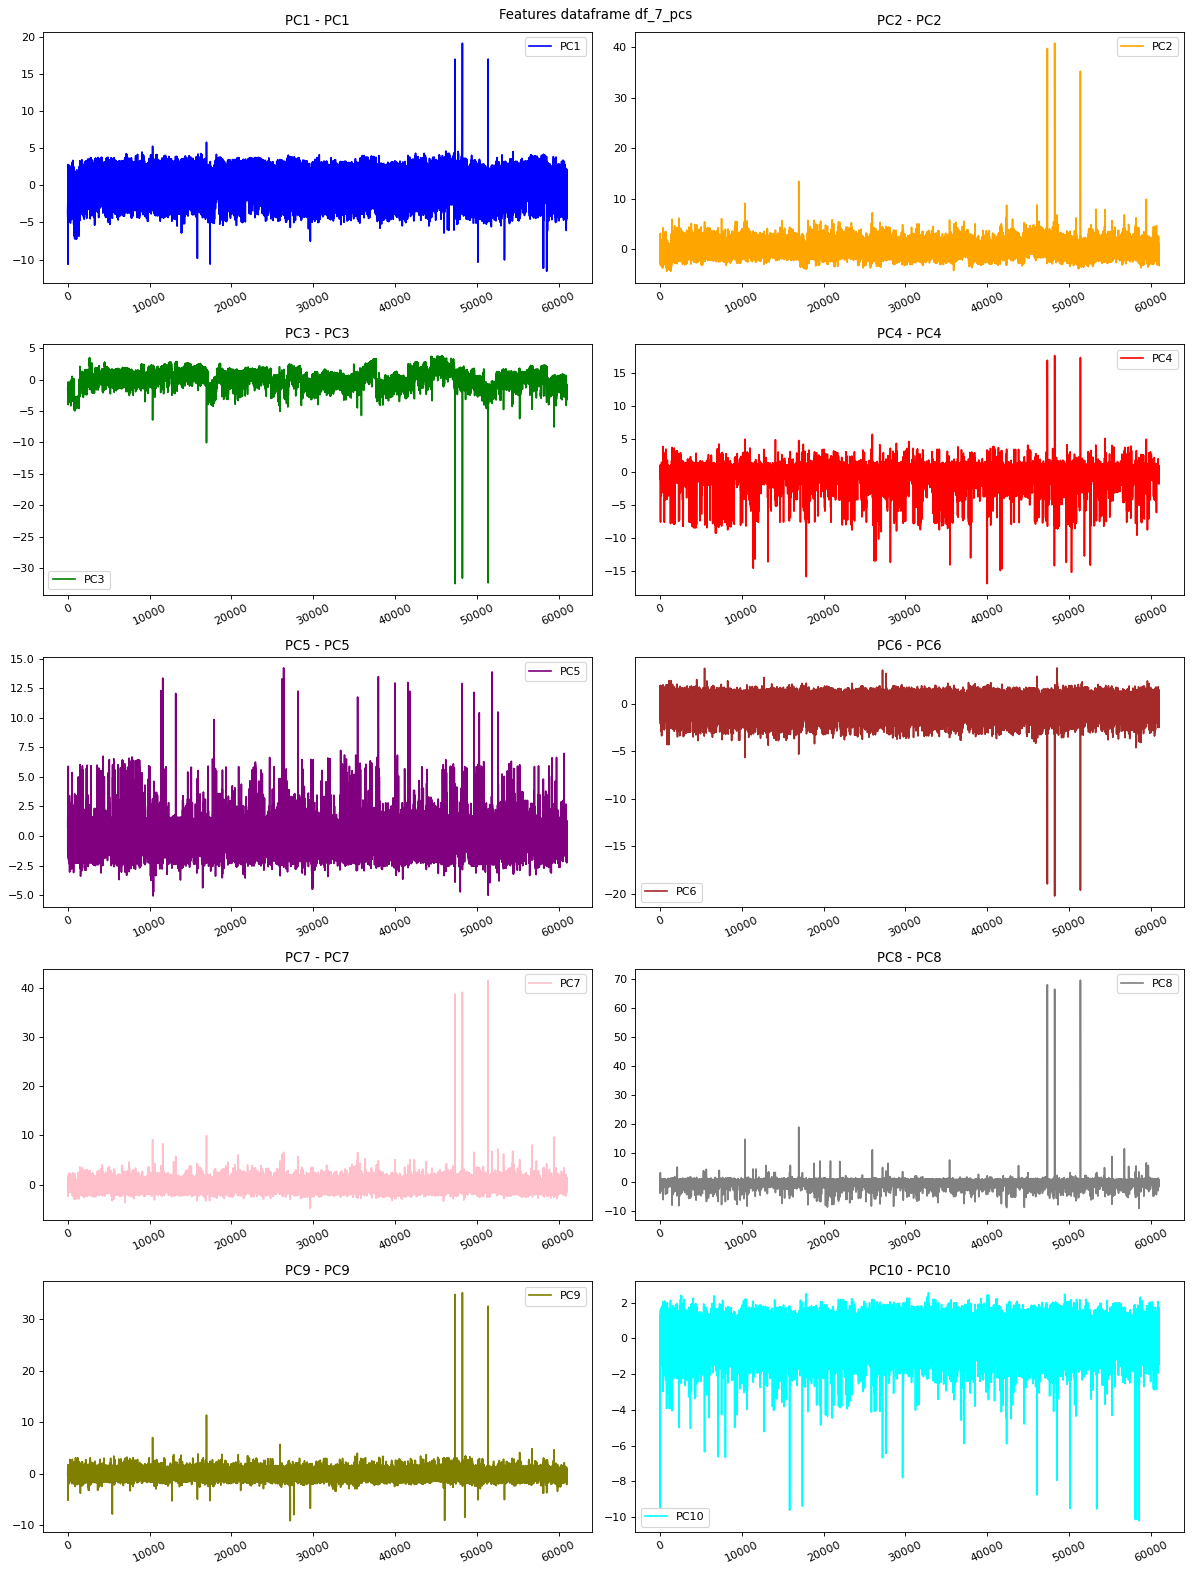

In [9]:
#plots of each feature of the v_dataframe_1_pcs
cc_fi_fcts_data_treatment.fct_show_raw_visualization(
    data=v_dataframe_1_pcs,
    feature_keys=v_dataframe_1_pcs.columns.tolist(),
    titles=v_titles,
    colors=v_colors,\
    v_cols=v_cols_for_all_features_subplots,
    v_name_dataframe=val_name_dataframe_1_pcs)



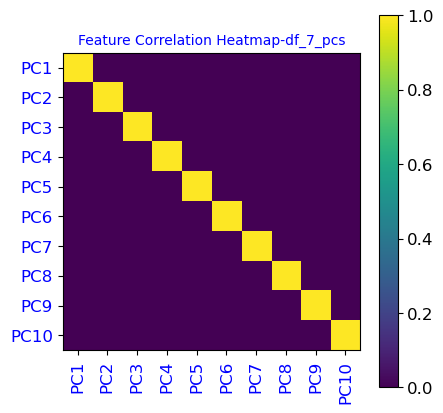

In [10]:
#plot of the feature heatmap for v_dataframe_1_pcs
cc_fi_fcts_data_treatment.fct_show_feature_heatmap(\
data=v_dataframe_1_pcs,\
val_name_dataframe=val_name_dataframe_1_pcs)

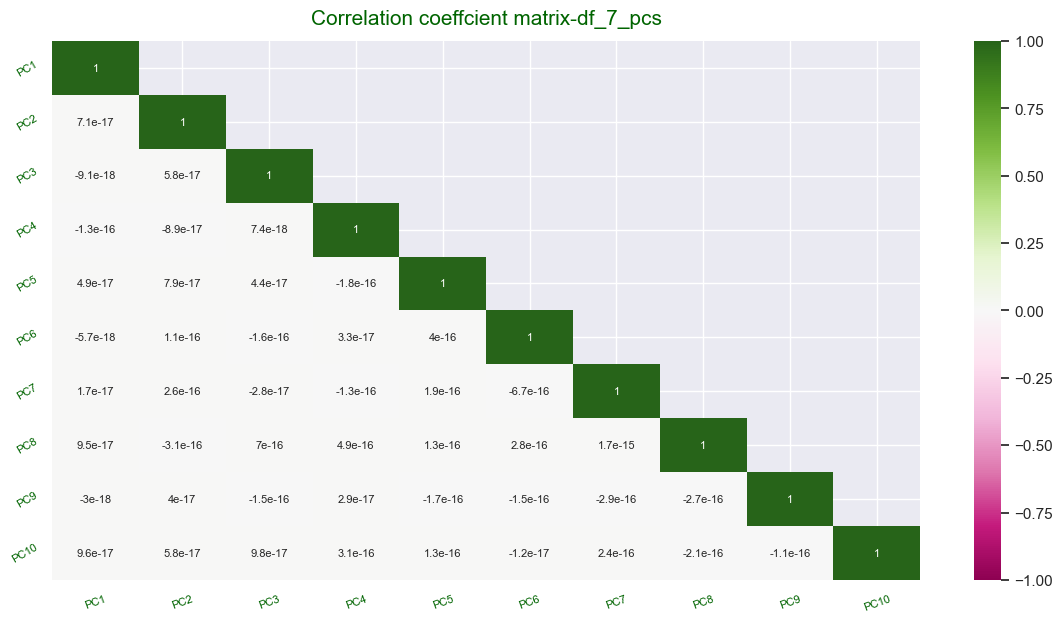

In [11]:
#plot of the correlation matrix for 
#v_dataframe_1_pcs
cc_fi_fcts_data_treatment.fct_show_cor_coef_matrix(\
val_data=v_dataframe_1_pcs,\
val_name_dataframe=val_name_dataframe_1_pcs)

In [12]:
#Creation of the feature set and target set for
#dataframe di_df[0] (dataframe with samples in cluster 0)
X_0 = v_dataframe_1_pcs
y_0 = v_dataframe_1['price']


# shuffle=True by default for train_test_split
#create train, validation and test sets for di_df[0]
#however as we will not make validations on the test set
#we could use the entire set
X_train_0_a, X_test_0, y_train_0_a, y_test_0 =\
train_test_split(X_0, y_0, test_size=0.2, random_state=1)

X_train_0_b, X_val_0, y_train_0_b, y_val_0 =\
train_test_split(X_train_0_a, y_train_0_a, test_size=0.25, random_state=1)

#AS IN THE OTHER MODELS DESPIT THE FACT THAT K-FOLD CROSS VALIDATION
#WILL BE EMPLOYED THE TRAIN SET IS EMPLOYED INSTEAD OF THE ENTIRE DATASET
#THIS IS DUE TO COMPUTER LIMITATIONS ANDTIME CONSTRAINTS.
#AS MENTIONNED IN THE REPORT ALL MODELS SHOULD BE FIT IN THE ENTRIE DATASET
#HERE NAMES X_O WITHY_O AS TARGET COLUMN



In [13]:
#pipeline with PolynomialFeatures feature creation 
#and Linear regression model
lin_regression_pipe=\
Pipeline([('poly_features', PolynomialFeatures(include_bias=False)),\
('scaler', StandardScaler()),('model', LinearRegression(n_jobs=10000000))])


#pipeline with PolynomialFeatures feature creation 
#and Ridge regression model
ridge_pipe = Pipeline([('poly_features', PolynomialFeatures(include_bias=False)),\
('scaler', StandardScaler()),('model', Ridge(max_iter=10000000))])


#pipeline with PolynomialFeatures feature creation 
#and Ridge regression model
lasso_pipe=Pipeline([('poly_features', PolynomialFeatures(include_bias=False)),\
('scaler', StandardScaler()),\
('model',Lasso(random_state=42,max_iter=10000000) )])


#pipeline with PolynomialFeatures feature creation, 
#Lasso feature selector and Linear regression model
lasso_feature_selector_with_LR_model_pipe=\
Pipeline([('poly_features', PolynomialFeatures(include_bias=False)),
('scaler', StandardScaler()),
('feature_selector_l1', SelectFromModel(Lasso(random_state = 42,max_iter=10000000))),
('model', LinearRegression(n_jobs=10000000))])

#pipeline with PolynomialFeatures feature creation, 
#Lasso feature selector and Ridge regression model
lasso_feature_selector_with_Ridge_model_pipe=\
Pipeline([('poly_features', PolynomialFeatures(include_bias=False)),
('scaler', StandardScaler()),
('feature_selector_l2', SelectFromModel(Lasso(random_state=42,max_iter=10000000))),
('model', Ridge(max_iter=10000000))])


#pipeline with PolynomialFeatures feature creation, 
#Lasso feature selector and Lasso regression model
lasso_feature_selector_with_Lasso_model_pipe=\
Pipeline([('poly_features', PolynomialFeatures(include_bias=False)),
('scaler', StandardScaler()),
('feature_selector_l3', SelectFromModel(Lasso(random_state=42,max_iter=10000000))),
('model', Lasso(random_state=42,max_iter=10000000))])


In [14]:
#dictionary with the parameters for LR pipeline 
param_dict_lin_regression_pipe ={\
'estim':[lin_regression_pipe],\
'estim__poly_features__degree':[1,2],\
'estim__model__fit_intercept':[True,False]}

#dictionary with the parameters for Ridge  pipeline 
param_dict_ridge_pipe ={\
'estim':[ridge_pipe],\
'estim__poly_features__degree':[1,2,3],\
'estim__model__fit_intercept':[True,False],
'estim__model__alpha':[5,10,20]}#,7,10,15,20,25,30,50]}
#[0.05,0.6,1,7,20,50]

##'estim__model__alpha':[0.02,0.45,0.6,1,3,5,7,20]

#dictionary with the parameters for Lasso pipeline 
param_dict_lasso_pipe={\
'estim':[lasso_pipe],\
'estim__poly_features__degree':[1,2,3],\
'estim__model__fit_intercept':[True,False],
'estim__model__alpha':[10,20,50]}#1,7,20]}
#[0.05,0.6,5]
#10 ok
#20 ok
#50 OK [1,2,3]

#dictionary with the parameters forLasso with LR pipeline 
param_dict_lasso_feat_select_lr_estim_pipe={\
'estim':[lasso_feature_selector_with_LR_model_pipe],\
'estim__poly_features__degree':[1,2],\
'estim__feature_selector_l1__estimator__fit_intercept':[True,False],
'estim__feature_selector_l1__estimator__alpha':[5,10,20]}
#[0.05,0.6,5]

#dictionary with the parameters for Lasso with Ridge pipeline 
param_dict_lasso_feat_select_ridge_estim_pipe={\
'estim':[lasso_feature_selector_with_Ridge_model_pipe],\
'estim__poly_features__degree':[1,2],\
'estim__feature_selector_l2__estimator__fit_intercept':[True,False],\
'estim__feature_selector_l2__estimator__alpha':[5,7,10,20,30],\
'estim__model__alpha':[5,10,20,30]}


param_dict_lasso_feat_select_lasso_estim_pipe={\
'estim':[lasso_feature_selector_with_Lasso_model_pipe],\
'estim__poly_features__degree':[1,2],\
'estim__feature_selector_l3__estimator__fit_intercept':[True,False],\
'estim__feature_selector_l3__estimator__alpha':[5,7,10,20,30],\
'estim__model__alpha':[5,10,20,30]}





In [15]:
pipeline = Pipeline([('estim', lin_regression_pipe)])
#pipeline = Pipeline([('estim', lasso_feature_selector_with_Lasso_model_pipe)])

#params = [param_dict_lasso_feat_select_lasso_estim_pipe]

#list with the dictionaries with the parameters for each pipeline
params = [param_dict_lin_regression_pipe,\
param_dict_ridge_pipe,\
param_dict_lasso_pipe,\
param_dict_lasso_feat_select_lr_estim_pipe,\
param_dict_lasso_feat_select_ridge_estim_pipe,\
param_dict_lasso_feat_select_lasso_estim_pipe]

          
    
gs_obj_df_7_pcs=GridSearchCV(pipeline, params, cv=5, scoring='neg_mean_squared_error')


In [16]:
#we use the train set to fit the gridsearch object so as to 
#verify the predictions (if we are interested in) in the test set.
#however, as here we are interested in the most important features 
#we could have used the entire dataset

gs_obj_df_7_pcs.fit(X_train_0_a,y_train_0_a)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('estim',
                                        Pipeline(steps=[('poly_features',
                                                         PolynomialFeatures(include_bias=False)),
                                                        ('scaler',
                                                         StandardScaler()),
                                                        ('model',
                                                         LinearRegression(n_jobs=10000000))]))]),
             param_grid=[{'estim': [Pipeline(steps=[('poly_features',
                                                     PolynomialFeatures(include_bias=False)),
                                                    ('scaler',
                                                     StandardScaler()),
                                                    ('model',
                                                     LinearRegressio...
                                                     SelectFromModel(estimator=Lasso(max_iter=10000000,
                                                                                     random_state=42))),
                                                    ('model',
                                                     Lasso(max_iter=10000000,
                                                           random_state=42))])],
                          'estim__feature_selector_l3__estimator__alpha': [5, 7,
                                                                           10,
                                                                           20,
                                                                           30],
                          'estim__feature_selector_l3__estimator__fit_intercept': [True,
                                                                                   False],
                          'estim__model__alpha': [5, 10, 20, 30],
                          'estim__poly_features__degree': [1, 2]}],
             scoring='neg_mean_squared_error')

In [18]:
#import pickle
#we save in memory the gridsearch object
with open("gs_obj_df_7_pcs.pkl", 'wb') as fp0:
    pickle.dump(gs_obj_df_7_pcs,fp0)

In [19]:
#the best parameters of the gridsearch object
gs_obj_df_7_pcs.best_params_

{'estim': Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                 ('scaler', StandardScaler()),
                 ('feature_selector_l2',
                  SelectFromModel(estimator=Lasso(alpha=20, max_iter=10000000,
                                                  random_state=42))),
                 ('model', Ridge(alpha=30, max_iter=10000000))]),
 'estim__feature_selector_l2__estimator__alpha': 20,
 'estim__feature_selector_l2__estimator__fit_intercept': True,
 'estim__model__alpha': 30,
 'estim__poly_features__degree': 2}

In [20]:
#the best model 
best_model = gs_obj_df_7_pcs.best_estimator_
best_model

Pipeline(steps=[('estim',
                 Pipeline(steps=[('poly_features',
                                  PolynomialFeatures(include_bias=False)),
                                 ('scaler', StandardScaler()),
                                 ('feature_selector_l2',
                                  SelectFromModel(estimator=Lasso(alpha=20,
                                                                  max_iter=10000000,
                                                                  random_state=42))),
                                 ('model',
                                  Ridge(alpha=30, max_iter=10000000))]))])

In [21]:
gs_obj_df_7_pcs.best_estimator_.steps

[('estim',
  Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                  ('scaler', StandardScaler()),
                  ('feature_selector_l2',
                   SelectFromModel(estimator=Lasso(alpha=20, max_iter=10000000,
                                                   random_state=42))),
                  ('model', Ridge(alpha=30, max_iter=10000000))]))]

In [22]:
#import sys
#sys.exit()

SystemExit: 

/Users/jennie/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3513: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
#import cc_fi_fcts_data_treatment

In [ ]:
gs_obj_df_7_pcs_from_pickle=pd.read_pickle("gs_obj_df_7_pcs.pkl")
va_fit_gridsearchcv_obj=gs_obj_df_7_pcs_from_pickle

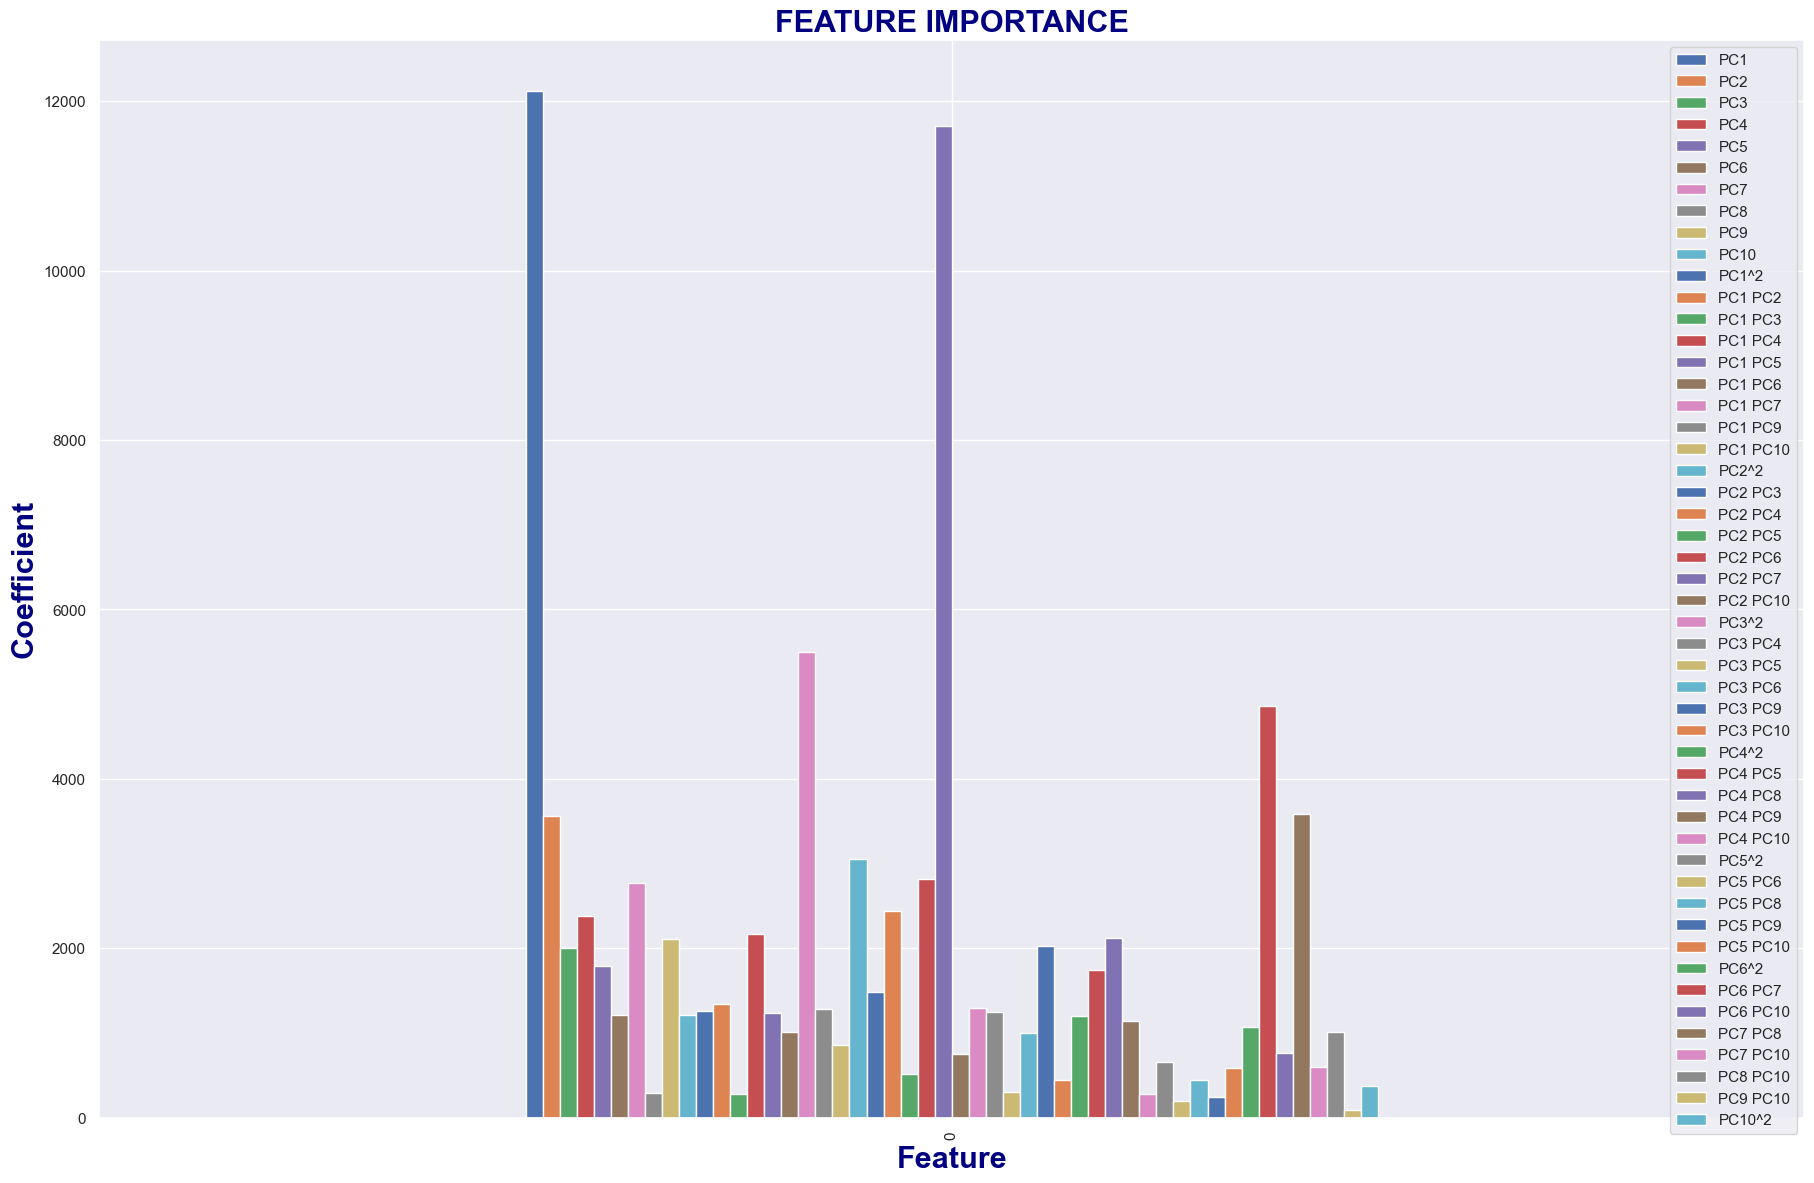

In [24]:
#plot the feature importance and return two datframes
#one with the absolute values of the coefficients in decreasing order
#and another witht he real values of the coefficients in decreasing order.
df1_abs_sorted, df1_sorted=\
cc_fi_fcts_data_treatment.\
fct_plot_and_treat_LR_or_Ridge_results_when_lasso_feature_selector(\
val_fit_gridsearchcv_obj=gs_obj_df_7_pcs,\
val_name_feature_selector_lasso='feature_selector_l2',                                                                            
val_title_fig="FEATURE IMPORTANCE",\
val_xlabel_fig="Feature",\
val_ylabel_fig="Coefficient")

In [25]:
#the  absolute value of the feature  coefficients in a decreasing order
df1_abs_sorted

,PC1,PC2 PC7,PC1 PC7,PC6 PC7,PC7 PC8,PC2,PC2^2,PC2 PC6,PC7,PC2 PC4,...,PC3 PC10,PC5 PC8,PC10^2,PC3 PC5,PC8,PC4 PC10,PC1 PC3,PC5 PC9,PC5 PC6,PC9 PC10
0,12118.644413,11701.38552,5495.436466,4864.753388,3582.159571,3557.199474,3056.958894,2818.903346,2773.866043,2444.416432,...,443.067543,440.767393,377.296348,306.593396,287.860181,285.248535,278.522032,250.320817,199.63167,89.974643


In [27]:
#save the df_abs_sorted in memory
with open("df1_abs_sorted_pca.pkl", 'wb') as fppca1:
    pickle.dump(df1_abs_sorted,fppca1)

In [28]:
#the  real value of the feature  coefficients in a decreasing order
df1_sorted

,PC2 PC7,PC1 PC7,PC6 PC7,PC2 PC4,PC1 PC4,PC9,PC3 PC9,PC3,PC1 PC5,PC8 PC10,...,PC4 PC5,PC5,PC4 PC8,PC4,PC7,PC2 PC6,PC2^2,PC2,PC7 PC8,PC1
0,11701.38552,5495.436466,4864.753388,2444.416432,2164.093055,2108.702537,2025.548023,2001.79103,1237.925245,1012.297807,...,-1747.501774,-1796.547229,-2120.997908,-2385.838926,-2773.866043,-2818.903346,-3056.958894,-3557.199474,-3582.159571,-12118.644413


In [30]:
#save the df_abs_sorted in memory
with open("df1_sorted_pca.pkl", 'wb') as fppca2:
    pickle.dump(df1_sorted,fppca2)